In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Data
import xarray as xr
import h5py

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful
import time
import datetime
import random

# My Methods
import importlib
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd
from src.models.CRPS_baseline.CRPS_load import *

<IPython.core.display.Javascript object>

### 0. Basics

In [4]:
var_names = ["u10", "v10", "t2m", "t850", "z500", "ws10"]

<IPython.core.display.Javascript object>

In [5]:
# setup:
ran_lat = random.randint(0, 119)
ran_lon = random.randint(0, 129)
ran_forecast_date = random.randint(0, 1428)
lead_times = [1, 15, 30]  # Lead times to plot boxplot with

<IPython.core.display.Javascript object>

### 1. Load Data

In [6]:
dat_train_norm = ldp.load_data_all_train_proc_norm()
dat_test_norm = ldp.load_data_all_test_proc_norm()
dat_train_denorm = ldpd.load_data_all_train_proc_denorm()
dat_test_denorm = ldpd.load_data_all_test_proc_denorm()
dat_raw = ldr.load_data_raw()

<IPython.core.display.Javascript object>

### 2. Boxplot Denormed mean and std

#### 2.1 Boxplot for t2m

In [7]:
dat_train_denorm_t2m = dat_train_denorm[2]

<IPython.core.display.Javascript object>

In [8]:
# The values of the mean and stds
means_t2m = dat_train_denorm_t2m.t2m_train.isel(
    lat=ran_lat, lon=ran_lon, lead_time=lead_times, mean_std=0
)
stds_t2m = dat_train_denorm_t2m.t2m_train.isel(
    lat=ran_lat, lon=ran_lon, lead_time=lead_times, mean_std=1
)

<IPython.core.display.Javascript object>

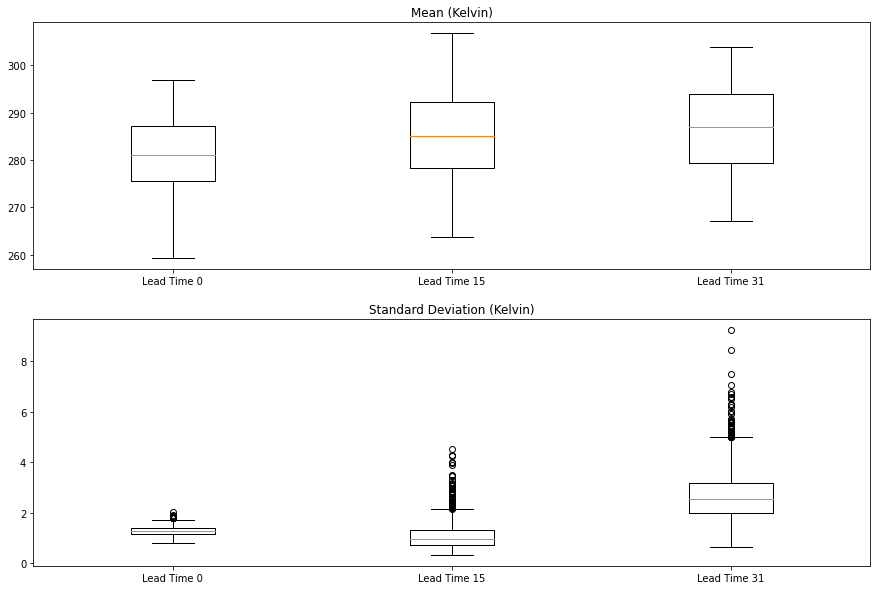

<IPython.core.display.Javascript object>

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Create an empty lists to store the data for each boxplot
boxplot_means = []
boxplot_stds = []

# Fill the list with data
for i in range(3):
    boxplot_means.append(means_t2m.isel(lead_time=i))
    boxplot_stds.append(stds_t2m.isel(lead_time=i))

# Create boxplots from the data list
axs[0].boxplot(boxplot_means)
axs[1].boxplot(boxplot_stds)

# Add x-axis labels if necessary
axs[0].set_xticklabels(["Lead Time 0", "Lead Time 15", "Lead Time 31"])
axs[0].set_title("Mean (Kelvin)")

axs[1].set_xticklabels(["Lead Time 0", "Lead Time 15", "Lead Time 31"])
axs[1].set_title("Standard Deviation (Kelvin)")

plt.show()

#### 2.2 Boxplot for ws10

In [10]:
dat_train_denorm_ws10 = dat_train_denorm[5]

<IPython.core.display.Javascript object>

In [11]:
# The values of the mean and stds
means_ws10 = dat_train_denorm_ws10.ws10_train.isel(
    lat=ran_lat, lon=ran_lon, lead_time=lead_times, mean_std=0
)
stds_ws10 = dat_train_denorm_ws10.ws10_train.isel(
    lat=ran_lat, lon=ran_lon, lead_time=lead_times, mean_std=1
)

<IPython.core.display.Javascript object>

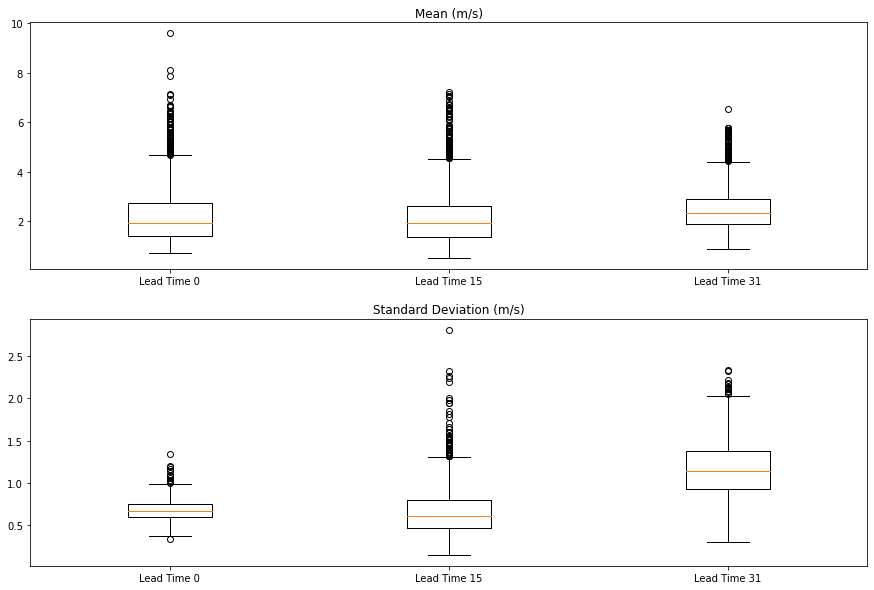

<IPython.core.display.Javascript object>

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Create an empty lists to store the data for each boxplot
boxplot_means = []
boxplot_stds = []

# Fill the list with data
for i in range(3):
    boxplot_means.append(means_ws10.isel(lead_time=i))
    boxplot_stds.append(stds_ws10.isel(lead_time=i))

# Create boxplots from the data list
axs[0].boxplot(boxplot_means)
axs[1].boxplot(boxplot_stds)

# Add x-axis labels if necessary
axs[0].set_xticklabels(["Lead Time 0", "Lead Time 15", "Lead Time 31"])
axs[0].set_title("Mean (m/s)")

axs[1].set_xticklabels(["Lead Time 0", "Lead Time 15", "Lead Time 31"])
axs[1].set_title("Standard Deviation (m/s)")

plt.show()

### 3. Maps

#### 3.1 CRPS score map t2m different lead_times:

In [13]:
t2m_crps_scores_array = crps_load_lead_lat_lon("t2m")

<IPython.core.display.Javascript object>

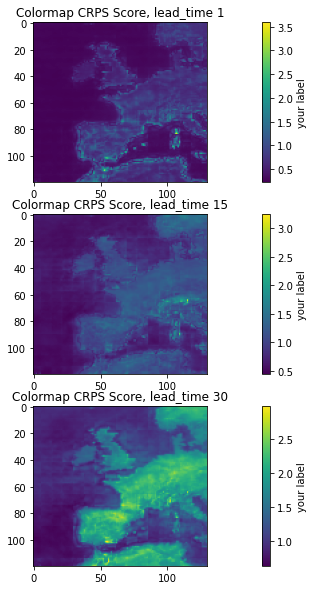

<IPython.core.display.Javascript object>

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
for i in range(3):
    im = axs[i].imshow(t2m_crps_scores_array[lead_times[i]], cmap="viridis")
    fig.colorbar(
        im, ax=axs[i], label="your label"
    )  # add colorbar to the figure and associate it with the axis
    axs[i].set_title(f"Colormap CRPS Score, lead_time {lead_times[i]}")
plt.show()

#### 3.2 t2m mean on map

In [15]:
t2m_preds = dat_train_denorm[2].t2m_train.isel(
    lead_time=1, mean_std=0, forecast_date=ran_forecast_date
)
t2m_truth = dat_train_denorm[2].t2m_truth.isel(
    lead_time=1, forecast_date=ran_forecast_date
)

<IPython.core.display.Javascript object>

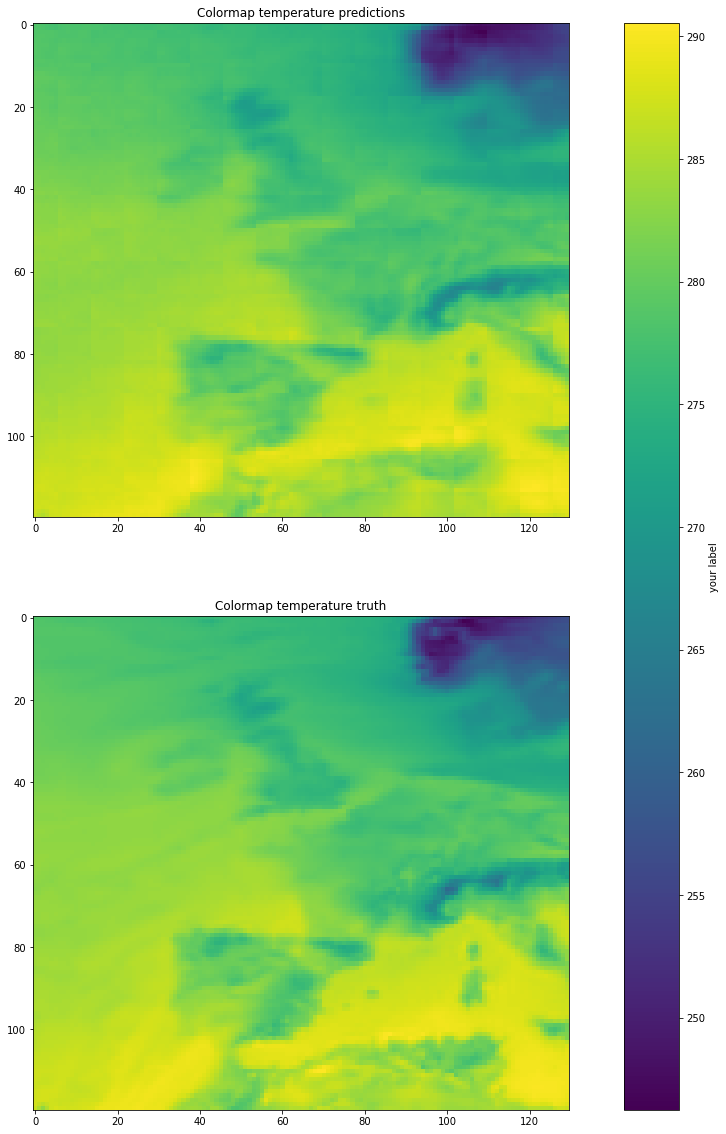

<IPython.core.display.Javascript object>

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

im = axs[0].imshow(t2m_preds.values, cmap="viridis")
im = axs[1].imshow(t2m_truth.values, cmap="viridis")
fig.colorbar(
    im, ax=axs[:], label="your label"
)  # add colorbar to the figure and associate it with the axis
axs[0].set_title("Colormap temperature predictions")
axs[1].set_title("Colormap temperature truth")
plt.show()

#### 3.3 ws10 on a map

In [89]:
ws10_preds = dat_train_denorm[5].ws10_train.isel(
    lead_time=30, mean_std=0, forecast_date=ran_forecast_date
)
ws10_truth = dat_train_denorm[5].ws10_truth.isel(
    lead_time=30, forecast_date=ran_forecast_date
)

<IPython.core.display.Javascript object>

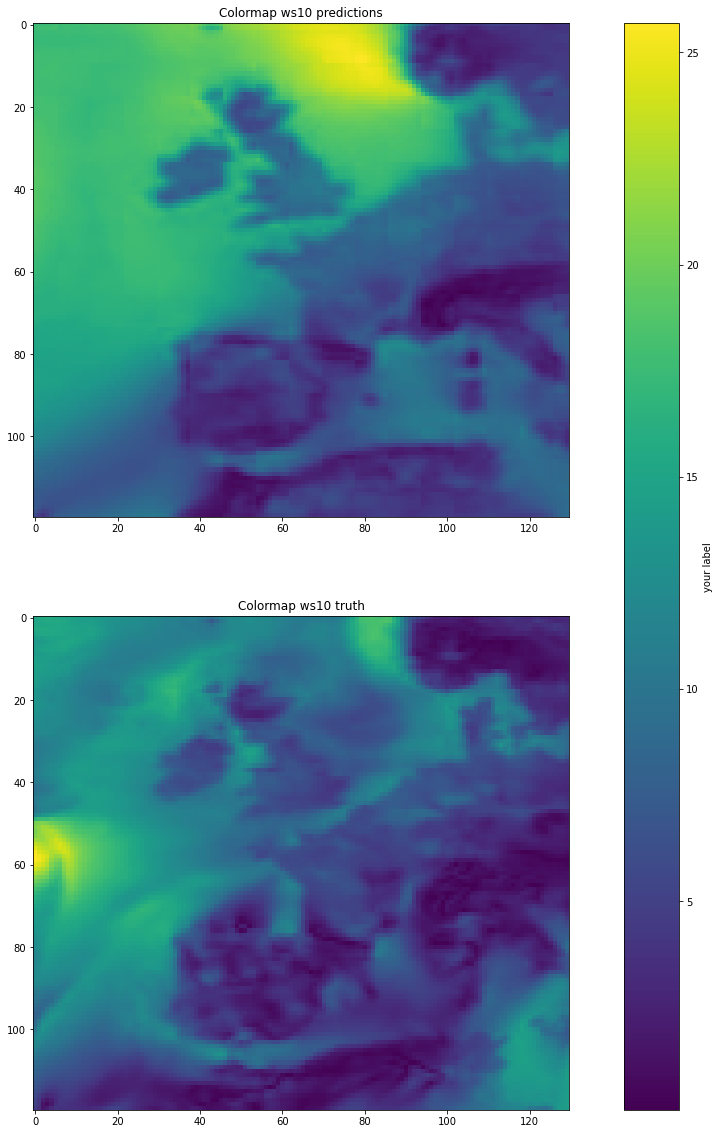

<IPython.core.display.Javascript object>

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

im = axs[0].imshow(ws10_preds.values, cmap="viridis")
im = axs[1].imshow(ws10_truth.values, cmap="viridis")
fig.colorbar(
    im, ax=axs[:], label="your label"
)  # add colorbar to the figure and associate it with the axis
axs[0].set_title("Colormap ws10 predictions")
axs[1].set_title("Colormap ws10 truth")
plt.show()